https://www.kaggle.com/datasets/sooyoungher/smoking-drinking-dataset

In [32]:
import pandas as pd

df = pd.read_csv('/Users/sungyonglee/github/python_101_snu_2024_04/hongong_ml_dl/s2024_0608/data/smoking_driking_dataset_Ver01.csv')
display(df)

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991341,Male,45,175,80,92.1,1.5,1.5,1.0,1.0,114.0,...,125.0,132.0,15.0,1.0,1.0,26.0,36.0,27.0,1.0,N
991342,Male,35,170,75,86.0,1.0,1.5,1.0,1.0,119.0,...,84.0,45.0,15.8,1.0,1.1,14.0,17.0,15.0,1.0,N
991343,Female,40,155,50,68.0,1.0,0.7,1.0,1.0,110.0,...,77.0,157.0,14.3,1.0,0.8,30.0,27.0,17.0,3.0,Y
991344,Male,25,175,60,72.0,1.5,1.0,1.0,1.0,119.0,...,73.0,53.0,14.5,1.0,0.8,21.0,14.0,17.0,1.0,N


In [33]:
df = df.drop_duplicates()

In [34]:
# 남녀 비율 출력
print(df['sex'].value_counts())

# 음주 여부 비율 출력
print(df['DRK_YN'].value_counts())

# 흡연 비율
print(df['SMK_stat_type_cd'].value_counts())

sex
Male      526399
Female    464921
Name: count, dtype: int64
DRK_YN
N    495844
Y    495476
Name: count, dtype: int64
SMK_stat_type_cd
1.0    602431
3.0    213945
2.0    174944
Name: count, dtype: int64


In [35]:
# 이상치 확인

# 누락값 확인
print(df.isnull().sum().sum())

# 나이 이상치 확인
print(df['age'].describe())

0
count    991320.000000
mean         47.614529
std          14.181346
min          20.000000
25%          35.000000
50%          45.000000
75%          60.000000
max          85.000000
Name: age, dtype: float64


In [36]:
df['sex'] = df['sex'].apply(lambda x: 1 if x == 'Male' else 0)
df['DRK_YN'] = df['DRK_YN'].apply(lambda x: 1 if x == 'Y' else 0)

In [37]:
features = df.drop(columns=['SMK_stat_type_cd', 'DRK_YN']).to_numpy()
target = df['DRK_YN'].to_numpy()

print(features)
print(target)


[[  1.  35. 170. ...  21.  35.  40.]
 [  1.  30. 180. ...  20.  36.  27.]
 [  1.  40. 165. ...  47.  32.  68.]
 ...
 [  0.  40. 155. ...  30.  27.  17.]
 [  1.  25. 175. ...  21.  14.  17.]
 [  1.  50. 160. ...  24.  43.  36.]]
[1 0 0 ... 1 0 1]


In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [39]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(X_train)
X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

In [40]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)

LogisticRegression()

In [41]:
print(lr.score(X_train_scaled, y_train))
print(lr.score(X_test_scaled, y_test))

0.7220751119719162
0.7221986845821733


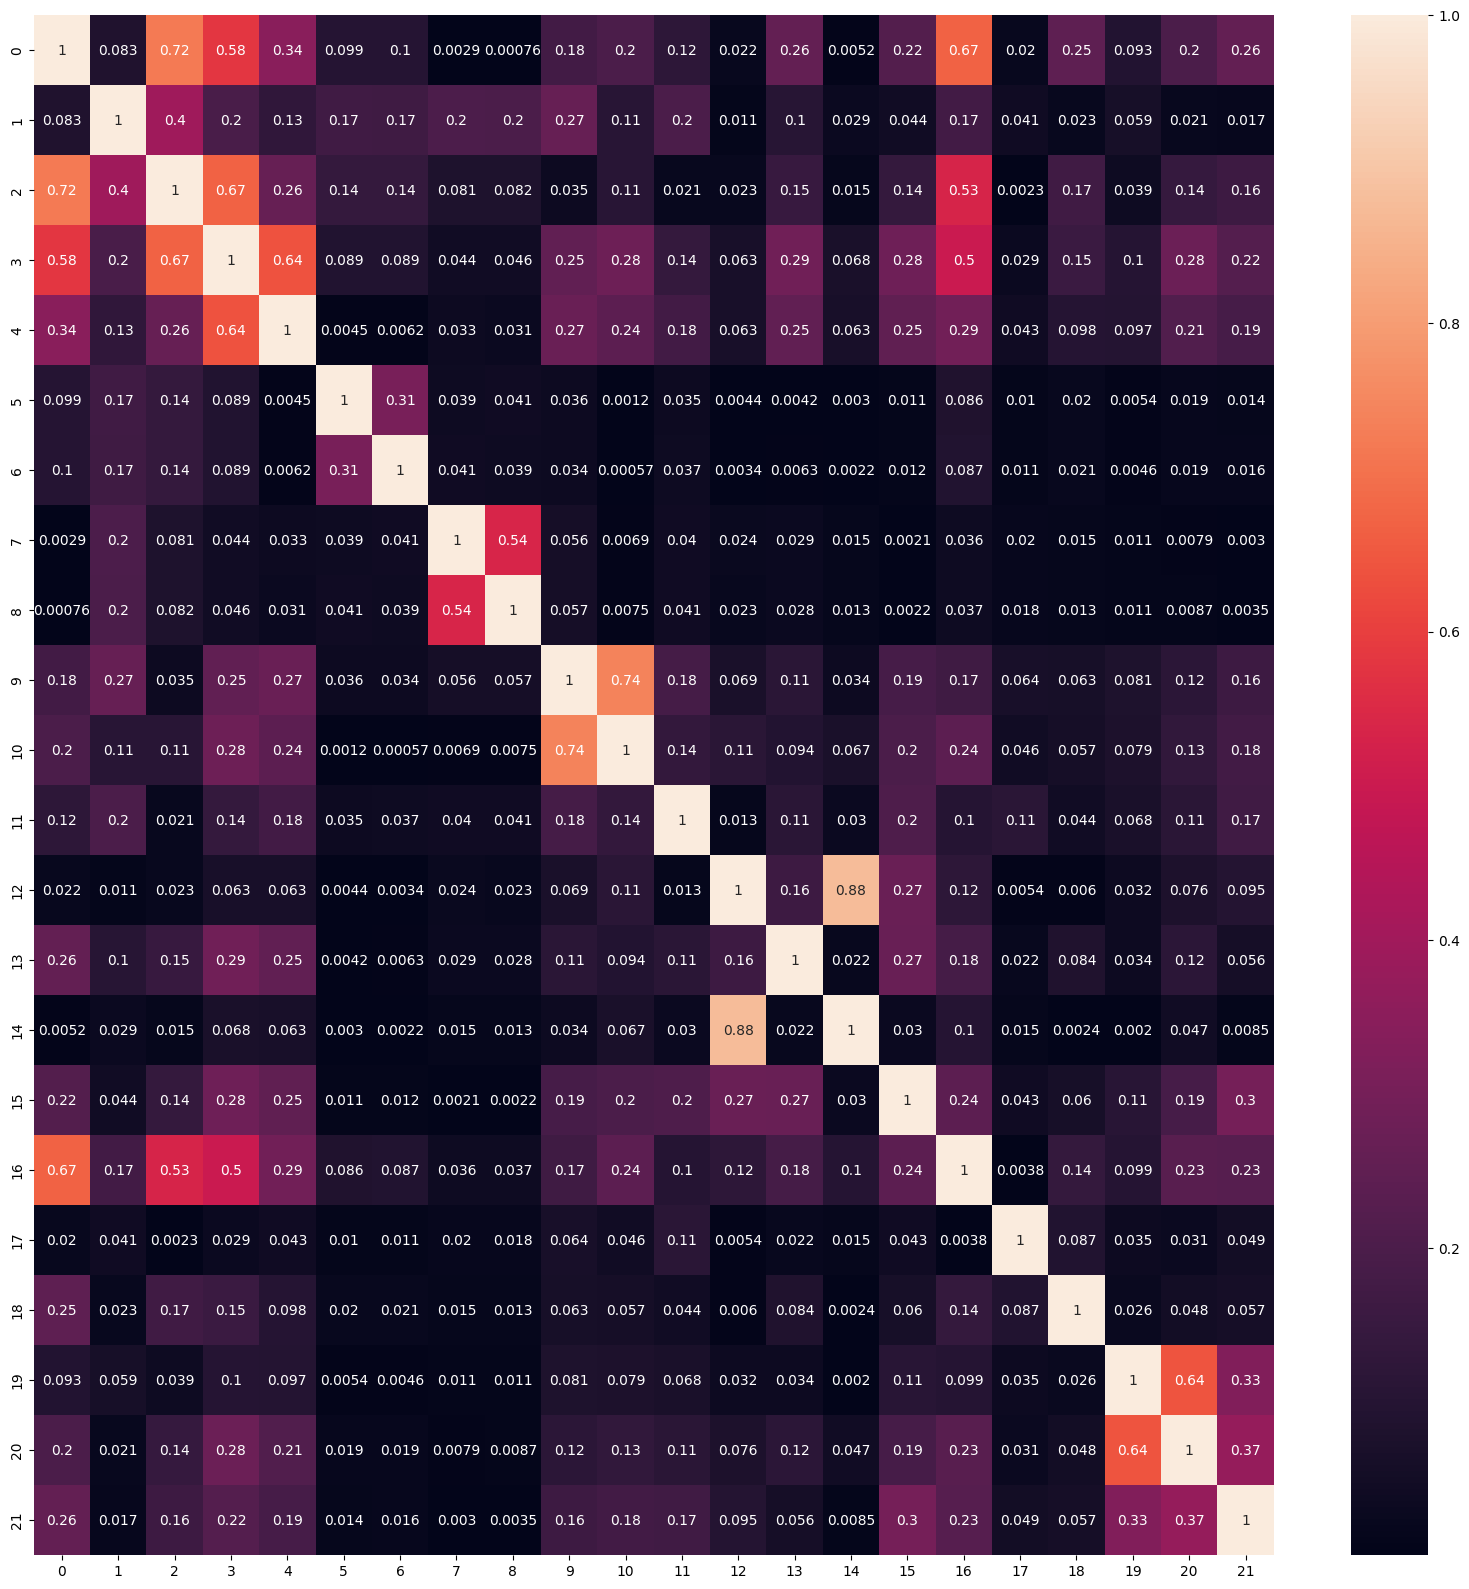

In [42]:
# 다중 공선성 확인
correlation_matrix = pd.DataFrame(features).corr().abs()

import seaborn as sns
from matplotlib import pyplot as plt

plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True)
plt.show()



In [43]:
# lasso로 불필요한 feature 제거

from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01)
lasso.fit(X_train_scaled, y_train)

print(lasso.coef_)

selected_features = df.drop(columns=['SMK_stat_type_cd', 'DRK_YN']).columns[lasso.coef_ != 0]
print(selected_features)

[ 0.12892703 -0.10546823  0.03193327  0.          0.          0.
  0.         -0.         -0.          0.          0.01525932  0.
  0.          0.04361008 -0.0107032   0.0052613   0.01190096 -0.
 -0.          0.         -0.01227067  0.05631243]
Index(['sex', 'age', 'height', 'DBP', 'HDL_chole', 'LDL_chole', 'triglyceride',
       'hemoglobin', 'SGOT_ALT', 'gamma_GTP'],
      dtype='object')


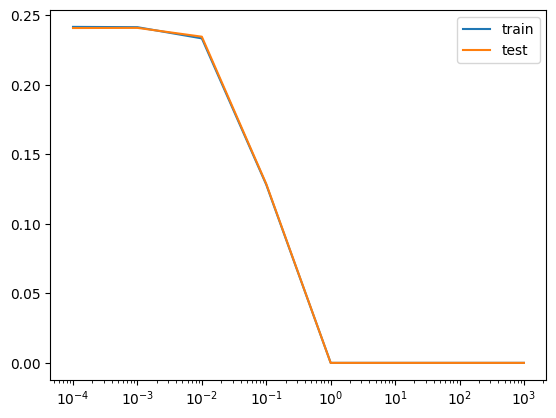

In [44]:

train_scores_por = []
test_scores_por = []

alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train_scaled, y_train)
    train_scores_por.append(lasso.score(X_train_scaled, y_train))
    test_scores_por.append(lasso.score(X_test_scaled, y_test))
    
import matplotlib.pyplot as plt

plt.plot(alphas, train_scores_por, label='train')
plt.plot(alphas, test_scores_por, label='test')
plt.xscale('log')
plt.legend()
plt.show()

In [45]:
features = df[selected_features].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [46]:
ss = StandardScaler()

ss.fit(X_train)
X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

lr = LogisticRegression()

lr.fit(X_train_scaled, y_train)

print(lr.score(X_train_scaled, y_train))
print(lr.score(X_test_scaled, y_test))

0.7208015575192672
0.7211495783399912


In [47]:
# 남녀로 분리하여 모델을 만든다면? 

# 남자 데이터
df
df_male = df[df['sex']==0]
df_female = df[df['sex']==1]
display(df_male)
display(df_female)

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
6,0,45,150,55,69.0,0.5,0.4,1.0,1.0,101.0,...,115.0,75.0,12.3,1.0,0.8,19.0,12.0,12.0,1.0,0
12,0,55,150,55,72.3,1.2,0.9,1.0,1.0,130.0,...,89.0,214.0,13.1,1.0,0.8,20.0,20.0,31.0,1.0,0
14,0,30,160,50,76.0,0.9,1.0,1.0,1.0,129.0,...,108.0,219.0,14.5,1.0,0.6,21.0,24.0,58.0,1.0,0
16,0,25,160,65,73.0,1.2,0.9,1.0,1.0,126.0,...,82.0,60.0,12.3,1.0,0.5,12.0,7.0,9.0,1.0,1
20,0,35,170,50,67.0,1.0,0.8,1.0,1.0,111.0,...,98.0,46.0,12.1,1.0,0.9,19.0,13.0,18.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991334,0,45,165,55,68.2,1.0,1.2,1.0,1.0,123.0,...,128.0,55.0,11.8,1.0,0.6,19.0,11.0,8.0,1.0,0
991335,0,60,150,65,83.0,0.7,0.8,1.0,1.0,122.0,...,153.0,100.0,13.1,1.0,0.6,29.0,23.0,20.0,2.0,1
991337,0,35,165,70,81.0,1.0,1.0,1.0,1.0,113.0,...,92.0,88.0,13.3,1.0,0.7,20.0,17.0,12.0,1.0,0
991340,0,50,150,50,72.6,1.0,1.0,1.0,1.0,116.0,...,105.0,125.0,15.2,1.0,0.8,28.0,26.0,29.0,1.0,0


,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,1,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,1
1,1,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,0
2,1,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,0
3,1,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,0
4,1,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991339,1,70,165,60,78.0,0.9,0.8,1.0,1.0,137.0,...,89.0,105.0,16.1,1.0,1.0,23.0,13.0,32.0,1.0,1
991341,1,45,175,80,92.1,1.5,1.5,1.0,1.0,114.0,...,125.0,132.0,15.0,1.0,1.0,26.0,36.0,27.0,1.0,0
991342,1,35,170,75,86.0,1.0,1.5,1.0,1.0,119.0,...,84.0,45.0,15.8,1.0,1.1,14.0,17.0,15.0,1.0,0
991344,1,25,175,60,72.0,1.5,1.0,1.0,1.0,119.0,...,73.0,53.0,14.5,1.0,0.8,21.0,14.0,17.0,1.0,0


In [48]:
features_m = df_male.drop(columns=['SMK_stat_type_cd', 'DRK_YN']).to_numpy()
target_m = df_male['DRK_YN'].to_numpy()

features_f = df_female.drop(columns=['SMK_stat_type_cd', 'DRK_YN']).to_numpy()
target_f = df_female['DRK_YN'].to_numpy()

In [49]:
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(features_m, target_m, test_size=0.2, random_state=42)
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(features_f, target_f, test_size=0.2, random_state=42)

In [50]:
ss_m = StandardScaler()
ss_f = StandardScaler()

ss_m.fit(X_train_m)
ss_f.fit(X_train_f)

X_train_scaled_m = ss_m.transform(X_train_m)
X_test_scaled_m = ss_m.transform(X_test_m)

X_train_scaled_f = ss_f.transform(X_train_f)
X_test_scaled_f = ss_f.transform(X_test_f)


In [51]:
lr_m = LogisticRegression()
lr_f = LogisticRegression()

lr_m.fit(X_train_scaled_m, y_train_m)
lr_f.fit(X_train_scaled_f, y_train_f)

print(lr_m.score(X_train_scaled_m, y_train_m))
print(lr_m.score(X_test_scaled_m, y_test_m))

print(lr_f.score(X_train_scaled_f, y_train_f))
print(lr_f.score(X_test_scaled_f, y_test_f))

0.7317898778284436
0.7317416787653923
0.7156623187270107
0.715387537993921


In [52]:
for column, coef in zip(df.drop(columns=['SMK_stat_type_cd', 'DRK_YN']).columns, lr_m.coef_[0]):
    print(f'{column}:\t {coef}')

sex:	 0.0
age:	 -0.8559619328697023
height:	 0.06665579363859536
weight:	 0.08070484618957045
waistline:	 -0.016174426683560506
sight_left:	 -0.004938425811505528
sight_right:	 -0.012402117926226398
hear_left:	 -0.010294638032670052
hear_right:	 -0.020047293612028005
SBP:	 -0.07804013575542214
DBP:	 0.1509736742390244
BLDS:	 0.010818864807134584
tot_chole:	 0.43919137169480826
HDL_chole:	 0.2025588804916118
LDL_chole:	 -0.4855109689946628
triglyceride:	 -0.09502527586342784
hemoglobin:	 0.06832001252086779
urine_protein:	 -0.014654288178701857
serum_creatinine:	 -0.04968803923964433
SGOT_AST:	 0.13662649182173436
SGOT_ALT:	 -0.2905138301148658
gamma_GTP:	 0.2659947845585293


In [56]:
proba_m = lr_m.predict_proba(X_test_scaled_m)
proba_f = lr_f.predict_proba(X_test_scaled_f)

print(proba_m[:10])
print(y_test_m[:40])
print(lr_m.predict(X_test_scaled_m)[:40])
print(proba_f[:10])
print(y_test_f[:10])

[[0.73128886 0.26871114]
 [0.8960092  0.1039908 ]
 [0.57385773 0.42614227]
 [0.50051546 0.49948454]
 [0.56041539 0.43958461]
 [0.62883998 0.37116002]
 [0.0745498  0.9254502 ]
 [0.29389605 0.70610395]
 [0.73564159 0.26435841]
 [0.91332437 0.08667563]]
[1 0 1 0 0 1 0 0 1 0 1 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 1 1]
[0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1
 0 0 1]
[[0.31962654 0.68037346]
 [0.19346781 0.80653219]
 [0.32871971 0.67128029]
 [0.6447241  0.3552759 ]
 [0.07152201 0.92847799]
 [0.38542002 0.61457998]
 [0.47407723 0.52592277]
 [0.69695341 0.30304659]
 [0.26879902 0.73120098]
 [0.55667253 0.44332747]]
[1 1 0 0 1 1 0 0 0 0]
